<a href="https://colab.research.google.com/github/Trrunghau/Trrunghau/blob/homework/handwrite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

.. 0


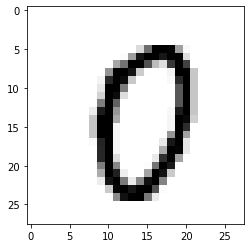

In [54]:
hinh = train_images[1000]
import matplotlib.pyplot as plt

plt.imshow(hinh,cmap = plt.cm.binary)
plt.show
print('..',train_labels[1000])


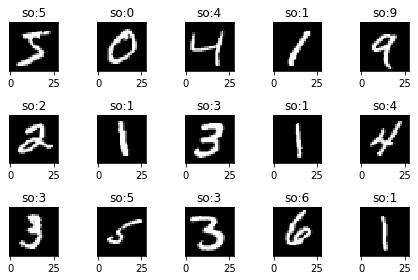

In [55]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title('so:{}'.format(train_labels[i]))
  plt.xticks
  plt.yticks([])

In [56]:
from keras import models
from keras.layers import Dense

In [57]:
from keras.models.cloning import Sequential
model=Sequential()
model.add(Dense(512,activation='relu',input_shape = (28*28,),name='layout1'))
model.add(Dense(10,activation='softmax',name='layoutN'))  # 10 layout
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layout1 (Dense)             (None, 512)               401920    
                                                                 
 layoutN (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [58]:
train_images=train_images.reshape((60000,28*28)) # đổi đầu vào thành 1 dãy
train_images=train_images.astype('float32')/255 # đổi kiểu int sang float
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

from keras.utils import to_categorical  # chuyển output sang số 1 nổi, 1 lần  
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [60]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics= ['accuracy'])
model.fit(train_images,train_labels,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('độ chính xác:',test_acc)
print('hàm mất mát',test_loss)

Epoch 1/10
469/469 [==============================] - 7s 12ms/step - loss: 0.0074 - accuracy: 0.9982
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0048 - accuracy: 0.9990
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0037 - accuracy: 0.9992
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0024 - accuracy: 0.9996
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0016 - accuracy: 0.9998
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0011 - accuracy: 0.9999
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 6.9251e-04 - accuracy: 1.0000
Epoch 8/10
469/469 [==============================] - 5s 12ms/step - loss: 4.8680e-04 - accuracy: 1.0000
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 4.1237e-04 - accuracy: 1.0000
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.06

In [100]:
model.save('model1.h5')

In [64]:
model11 = load_model('model1.h5')
model11.predict(test_images[51])

NameError: ignored

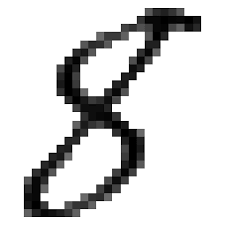

In [103]:
from keras.utils import load_img
url = 'images.img'
import matplotlib.pyplot as plt
img = load_img(url)
img.show()

In [104]:
img = load_img(url,target_size=(28,28))
from keras.utils import img_to_array

img = img_to_array(img)
img = img.reshape(3,28*28)
import numpy as np
img = img.astype('float32')
img=  img/255
np.argmax(model.predict(img),axis = -1)

1/1 [==============================] - 0s 25ms/step


array([3, 3, 3])